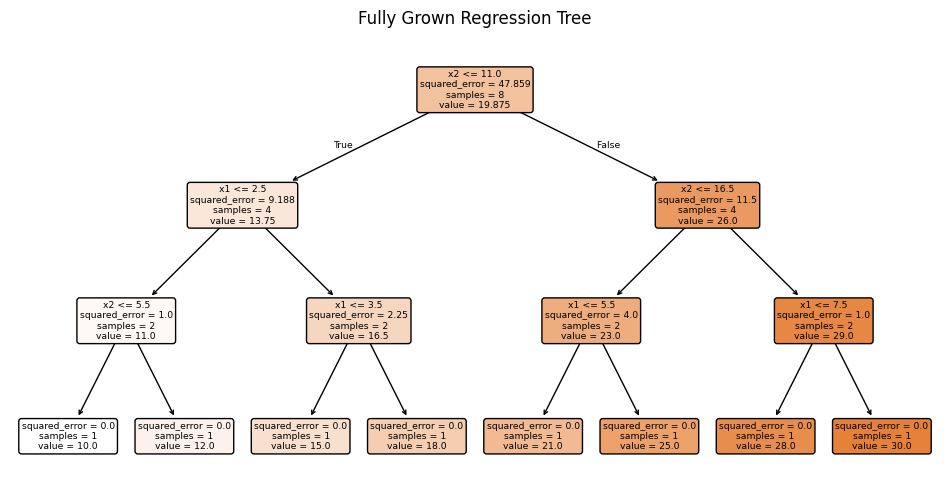

In [1]:
## Question 7

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Given dataset
X = np.array([
    [1, 5],
    [2, 6],
    [3, 8],
    [4, 10],
    [5, 12],
    [6, 15],
    [7, 18],
    [8, 20]
])  # Features (x1, x2)

y = np.array([10, 12, 15, 18, 21, 25, 28, 30])  # Target variable (y)

# Train a fully grown regression tree
reg_tree = DecisionTreeRegressor(max_depth=None)
reg_tree.fit(X, y)

# Visualize the regression tree
plt.figure(figsize=(12, 6))
plot_tree(reg_tree, feature_names=["x1", "x2"], filled=True, rounded=True)
plt.title("Fully Grown Regression Tree")
plt.show()


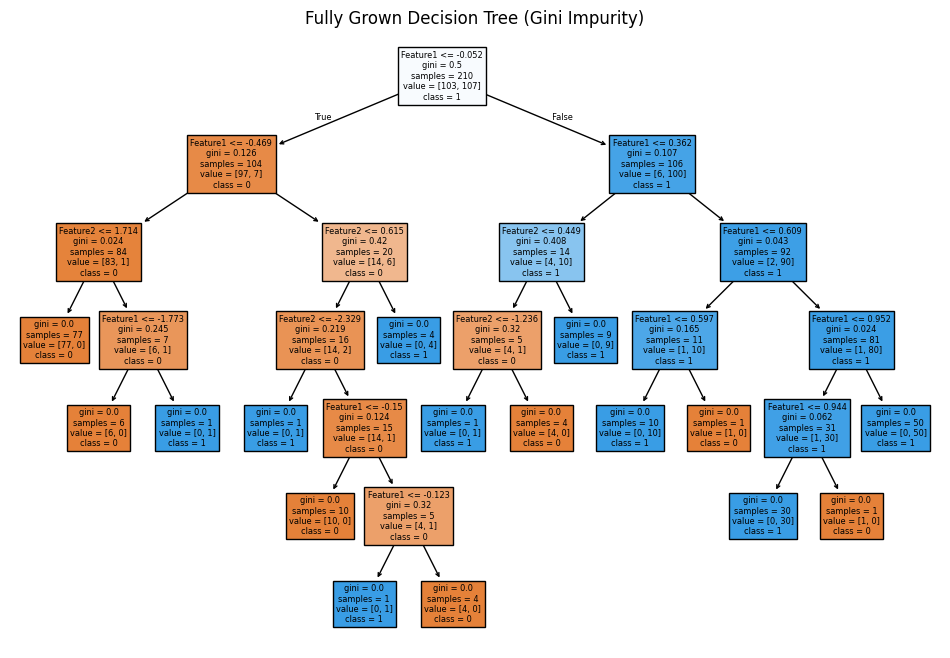

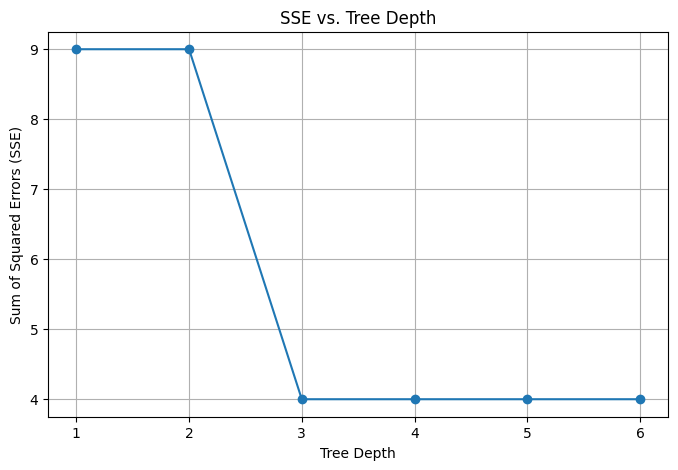

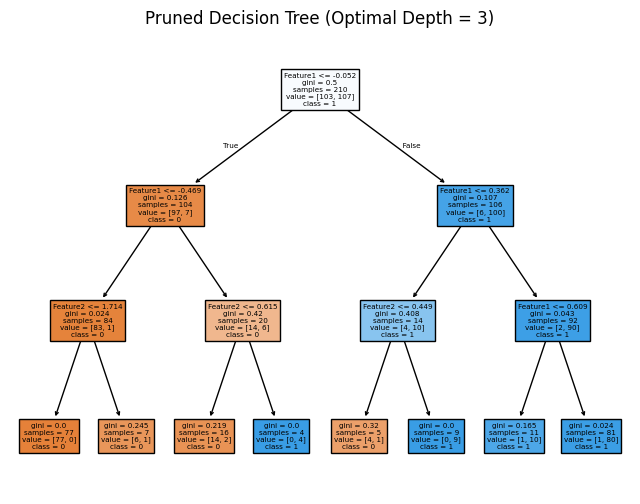

3

In [3]:
## Question 8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_path = "/content/A4_train.csv"
test_path = "/content/A4_test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

X_train, y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]
X_test, y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]

tree_clf = DecisionTreeClassifier(criterion='gini', random_state=42)
tree_clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.title("Fully Grown Decision Tree (Gini Impurity)")
plt.show()

depths = range(1, tree_clf.get_depth() + 1)
sse_values = []

for depth in depths:
    tree_clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
    tree_clf_pruned.fit(X_train, y_train)
    y_pred = tree_clf_pruned.predict(X_test)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  # SSE = MSE * N
    sse_values.append(sse)

#SSE vs. tree depth
plt.figure(figsize=(8, 5))
plt.plot(depths, sse_values, marker='o', linestyle='-')
plt.xlabel("Tree Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("SSE vs. Tree Depth")
plt.grid(True)
plt.show()

optimal_depth = depths[np.argmin(np.diff(sse_values, prepend=sse_values[0]))]

tree_clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)
tree_clf_pruned.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_tree(tree_clf_pruned, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.title(f"Pruned Decision Tree (Optimal Depth = {optimal_depth})")
plt.show()

optimal_depth
